<a href="https://colab.research.google.com/github/alikesha/Churn-Prediction/blob/main/Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div class="alert alert-block alert-success">
    <h1 align="center">Churn Modelling</h1>
     <h3 align="center">Dataset is from Kaggle.com</h3>
    <h4 align="center">Ali Keshavarz</h4>
</div>

#Install Pycaret and restart the kernel

In [ ]:
#pip install --pre pycaret -q

#Import libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import joblib

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

from sklearn.preprocessing import MinMaxScaler , OneHotEncoder , LabelEncoder
from sklearn.pipeline import make_pipeline , Pipeline
from sklearn.compose import make_column_transformer
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#read data

df = pd.read_csv('/content/IT_customer_churn.csv')
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
# dataframe info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [ ]:
#dataframe shape

df.shape

(7043, 20)

In [ ]:
#dataframe data types

df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [ ]:
#Checking number of churn

df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [ ]:
#changing the TotalCharges data type

pd.to_numeric(df.TotalCharges,errors='coerce').isnull().sum()

11

In [ ]:
#remove the records which they don't have TotalCharge (null)

df1 = df[df["TotalCharges"]!=" "]

In [ ]:
print(f"df shape is : {df.shape}")
print(f"df1 shape is : {df1.shape}")

df shape is : (7043, 20)
df1 shape is : (7032, 20)


In [ ]:
#substitue the numeric TotalCharges with object one

df1.TotalCharges = pd.to_numeric(df1.TotalCharges)
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

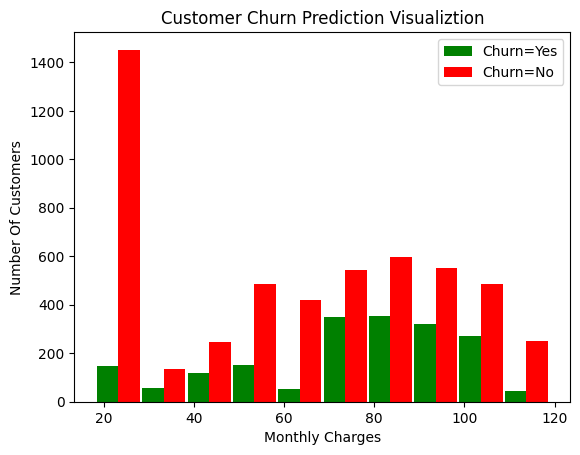

In [ ]:
#Customer Churn Prediction Visualiztion

mc_churn_no = df1[df1.Churn=='No'].MonthlyCharges
mc_churn_yes = df1[df1.Churn=='Yes'].MonthlyCharges

plt.xlabel("Monthly Charges")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

plt.hist([mc_churn_yes, mc_churn_no], rwidth=0.95, color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

#PreProcessing

In [ ]:
# OneHotEncoder and MinMaxScaler

ohe = OneHotEncoder(handle_unknown = 'ignore')
scaler = MinMaxScaler()

In [ ]:
#dataframe columns

df1.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
#make a function that shows the unique value of each column which contain object

def print_unique_col_values(df1):
       for column in df1:
            if df1[column].dtypes=='object':
                print(f'{column}: {df1[column].unique()}')

In [ ]:
print_unique_col_values(df1)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [ ]:
#replacing

df1.replace("No internet service","No",inplace=True)
df1.replace("No phone service","No",inplace=True)
df1.replace({'Male' : 1 , 'Female' : 0} , inplace=True)

In [ ]:
# changing string to int for columns which store yes or no value

yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
for col in yes_no_columns:
    df1[col].replace({'Yes': 1,'No': 0},inplace=True)

In [ ]:
print_unique_col_values(df1)

InternetService: ['DSL' 'Fiber optic' 'No']
Contract: ['Month-to-month' 'One year' 'Two year']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [ ]:
df1.sample()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
5919,1,0,0,0,67,1,0,DSL,1,0,1,0,0,1,Two year,0,Bank transfer (automatic),65.55,4361.55,0


In [ ]:
# make a list of column which should scale or encode

cols_to_ohe = ['InternetService' , 'Contract' , 'PaymentMethod']
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']

In [ ]:
# make a column transformer

clf = make_column_transformer(
    (ohe , cols_to_ohe),
    (scaler , cols_to_scale),
    remainder='passthrough')

In [ ]:
# fit the clf to the model and make a datafarme of that

transformed = clf.fit_transform(df1)
transformed_df = pd.DataFrame(transformed , columns = clf.get_feature_names_out())
transformed_df

,onehotencoder__InternetService_DSL,onehotencoder__InternetService_Fiber optic,onehotencoder__InternetService_No,onehotencoder__Contract_Month-to-month,onehotencoder__Contract_One year,onehotencoder__Contract_Two year,onehotencoder__PaymentMethod_Bank transfer (automatic),onehotencoder__PaymentMethod_Credit card (automatic),onehotencoder__PaymentMethod_Electronic check,onehotencoder__PaymentMethod_Mailed check,...,remainder__PhoneService,remainder__MultipleLines,remainder__OnlineSecurity,remainder__OnlineBackup,remainder__DeviceProtection,remainder__TechSupport,remainder__StreamingTV,remainder__StreamingMovies,remainder__PaperlessBilling,remainder__Churn
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
3,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0
7028,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0
7029,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7030,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


In [ ]:
transformed_df.dtypes

onehotencoder__InternetService_DSL                        float64
onehotencoder__InternetService_Fiber optic                float64
onehotencoder__InternetService_No                         float64
onehotencoder__Contract_Month-to-month                    float64
onehotencoder__Contract_One year                          float64
onehotencoder__Contract_Two year                          float64
onehotencoder__PaymentMethod_Bank transfer (automatic)    float64
onehotencoder__PaymentMethod_Credit card (automatic)      float64
onehotencoder__PaymentMethod_Electronic check             float64
onehotencoder__PaymentMethod_Mailed check                 float64
minmaxscaler__tenure                                      float64
minmaxscaler__MonthlyCharges                              float64
minmaxscaler__TotalCharges                                float64
remainder__gender                                         float64
remainder__SeniorCitizen                                  float64
remainder_

In [ ]:
# renaming the column

transformed_df = transformed_df.rename({'onehotencoder__InternetService_DSL': 'InternetService_DSL',
                                        'onehotencoder__InternetService_Fiber optic' : 'InternetService_Fiber optic',
                                        'onehotencoder__InternetService_No' : 'InternetService_No',
                                        'onehotencoder__Contract_Month-to-month' :'Contract_Month-to-month',
                                        'onehotencoder__Contract_One year' : 'Contract_One year',
                                        'onehotencoder__Contract_Two year' :'Contract_Two year',
                                        'onehotencoder__PaymentMethod_Bank transfer (automatic)' :'PaymentMethod_Bank transfer (automatic)',
                                        'onehotencoder__PaymentMethod_Credit card (automatic)' : 'PaymentMethod_Credit card (automatic)',
                                        'onehotencoder__PaymentMethod_Electronic check' : 'PaymentMethod_Electronic check' ,
                                        'onehotencoder__PaymentMethod_Mailed check' : 'PaymentMethod_Mailed check' ,
                                        'minmaxscaler__tenure' : 'tenure' ,
                                        'minmaxscaler__MonthlyCharges' : 'MonthlyCharges',
                                        'minmaxscaler__TotalCharges' : 'TotalCharges' ,
                                        'remainder__gender' : 'gender',
                                        'remainder__SeniorCitizen' :'SeniorCitizen' ,
                                        'remainder__Partner' :'Partner' ,
                                        'remainder__Dependents' :'Dependents' ,
                                        'remainder__PhoneService' :'PhoneService',
                                        'remainder__MultipleLines' :'MultipleLines' ,
                                        'remainder__OnlineSecurity' : 'OnlineSecurity',
                                        'remainder__OnlineBackup' : 'OnlineBackup',
                                        'remainder__DeviceProtection' :'DeviceProtection',
                                        'remainder__TechSupport' :'TechSupport',
                                        'remainder__StreamingTV' : 'StreamingTV',
                                        'remainder__StreamingMovies' :'StreamingMovies',
                                        'remainder__PaperlessBilling' : 'PaperlessBilling',
                                        'remainder__Churn' : 'Churn'} , axis = 'columns')

In [ ]:
transformed_df.sample()

,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,...,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,Churn
6541,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0


In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
components = pca.fit_transform(transformed_df)

fig = px.scatter(components , x = 0, y = 1 ,color = df1['Churn'])
fig.show()

#Using Pycaret

In [ ]:
from pycaret.classification import *

In [ ]:
setup(transformed_df , target='Churn', session_id = 1234 )

,Description,Value
0,Session id,1234
1,Target,Churn
2,Target type,Binary
3,Original data shape,"(7032, 27)"
4,Transformed data shape,"(7032, 27)"
5,Transformed train set shape,"(4922, 27)"
6,Transformed test set shape,"(2110, 27)"
7,Numeric features,26
8,Preprocess,True
9,Imputation type,simple


In [ ]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.8050,0.8507,0.5573,0.6571,0.6022,0.4744,0.4777,0.5550
lda,Linear Discriminant Analysis,0.8048,0.8436,0.5780,0.6498,0.6111,0.4815,0.4834,0.0470
ada,Ada Boost Classifier,0.8031,0.8465,0.5527,0.6537,0.5975,0.4687,0.4725,0.2580
gbc,Gradient Boosting Classifier,0.8029,0.8491,0.5458,0.6554,0.5944,0.4659,0.4701,0.7810
ridge,Ridge Classifier,0.8015,0.0000,0.5275,0.6582,0.5846,0.4565,0.4619,0.0440
lightgbm,Light Gradient Boosting Machine,0.7922,0.8346,0.5382,0.6272,0.5781,0.4415,0.4446,0.6230
rf,Random Forest Classifier,0.7915,0.8280,0.5030,0.6374,0.5604,0.4267,0.4329,0.5780
svm,SVM - Linear Kernel,0.7913,0.0000,0.4651,0.6667,0.5263,0.4036,0.4252,0.0920
xgboost,Extreme Gradient Boosting,0.7859,0.8211,0.5313,0.6121,0.5679,0.4268,0.4292,0.1740
et,Extra Trees Classifier,0.7802,0.8029,0.5007,0.6064,0.5471,0.4040,0.4080,0.6220


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [ ]:
my_model = create_model('svm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7769,0.0000,0.3282,0.6615,0.4388,0.3187,0.3492
1,0.8154,0.0000,0.6947,0.6408,0.6667,0.5393,0.5402
2,0.8069,0.0000,0.4504,0.7195,0.5540,0.4390,0.4586
3,0.7886,0.0000,0.4656,0.6421,0.5398,0.4071,0.4160
4,0.7866,0.0000,0.3206,0.7241,0.4444,0.3359,0.3787
5,0.7846,0.0000,0.4504,0.6344,0.5268,0.3925,0.4021
6,0.7927,0.0000,0.4351,0.6706,0.5278,0.4026,0.4180
7,0.7703,0.0000,0.2061,0.7500,0.3234,0.2356,0.3075
8,0.7947,0.0000,0.5154,0.6381,0.5702,0.4374,0.4417


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

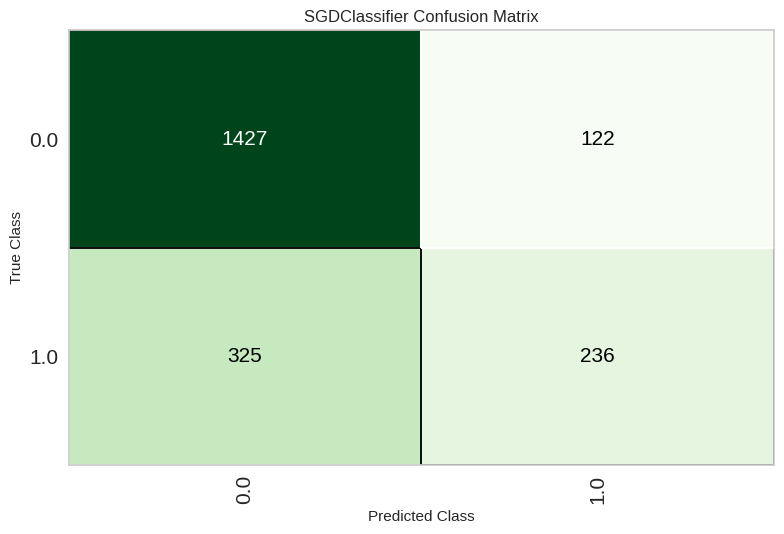

In [ ]:
plot_model(my_model , plot ='confusion_matrix')

#Train Test Split

In [ ]:
X = transformed_df.drop('Churn',axis='columns')
y = transformed_df.Churn


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [ ]:
print(f'{y_train.value_counts()}')
print('--'*10)
print(f'{y_test.value_counts()}')

0.0    4130
1.0    1495
Name: Churn, dtype: int64
--------------------
0.0    1033
1.0     374
Name: Churn, dtype: int64


In [ ]:
def my_model(model):
    model.fit(X_train, y_train)
    acc = model.score(X_test, y_test)
    print("Accuracy", acc, "\n")

    y_pred = model.predict(X_test)
    print("preds", y_pred[:5], "\n")

    cl_rep = classification_report(y_test,y_pred)
    print(cl_rep)

In [ ]:
lr = LogisticRegression()

my_model(lr)

Accuracy 0.8031272210376688 

preds [0. 0. 0. 0. 1.] 

              precision    recall  f1-score   support

         0.0       0.84      0.90      0.87      1033
         1.0       0.66      0.54      0.59       374

    accuracy                           0.80      1407
   macro avg       0.75      0.72      0.73      1407
weighted avg       0.79      0.80      0.80      1407



###we have imbalanced dataset. So we should use sampling methods

###We Use SMOTETomek

In [ ]:
from imblearn.combine import SMOTETomek

smt = SMOTETomek(sampling_strategy= 'auto')
X_smt , y_smt = smt.fit_resample(X , y)

y_smt.value_counts()

0.0    4877
1.0    4877
Name: Churn, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_smt, y_smt, test_size=0.2, random_state=15, stratify=y_smt)

In [ ]:
y_train.value_counts()

1.0    3902
0.0    3901
Name: Churn, dtype: int64

In [ ]:
# naive bayes as my  model

nb = GaussianNB()

my_model(nb)

Accuracy 0.7775499743721168 

preds [1. 0. 0. 0. 1.] 

              precision    recall  f1-score   support

         0.0       0.81      0.72      0.76       976
         1.0       0.75      0.83      0.79       975

    accuracy                           0.78      1951
   macro avg       0.78      0.78      0.78      1951
weighted avg       0.78      0.78      0.78      1951



In [ ]:
# SVM as our model

svm = SVC()

final_model = my_model(svm)

Accuracy 0.8329062019477191 

preds [1. 0. 0. 0. 1.] 

              precision    recall  f1-score   support

         0.0       0.85      0.81      0.83       976
         1.0       0.82      0.85      0.84       975

    accuracy                           0.83      1951
   macro avg       0.83      0.83      0.83      1951
weighted avg       0.83      0.83      0.83      1951



#Save The Model

In [ ]:
joblib.dump(final_model, 'finalmodel.joblib')

['finalmodel.joblib']